In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# eta - our x variable
# set up:
# even: tan(eta)
# odd: -cot(eta) = tan(eta + pi/2)
# zeta
m_e = 9.109E-31
h_bar = 1.05457182E-34
m2A = 1E-10
j2eV = 1.602176E-19
def get_energy_from_eta(l,eta):
    return (2*eta**2*h_bar**2)/((l*m2A)**2*m_e)/j2eV
def zeta(x,zeta0):
    return np.sqrt((zeta0/x)**2-1)
def get_min_locs(index,sorted,orig,z,tolerance):
    locations = []
    i = 0
    while i < len(sorted):
        loc_temp = z[np.where(orig == sorted[i])][0]
        if len(locations) > 0:
            if all(abs(locations[i][0] - loc_temp) > tolerance for i in range(len(locations))):
                    locations.append([loc_temp,sorted[i]])
                    # print(len(locations))
            # for item in locations:
            #     print('------------------------------------')
            #     print('locations:',locations)
            #     print('item:',item)
            #     print('loc_temp:',loc_temp)
                
        else:
            locations.append([loc_temp,sorted[i]])
        if len(locations) >= index: break
        i += 1
    return locations

    # return [z[np.where(orig == sorted[i])] for i in range(index)]

def create_1d_vl_box_plot(l,v0):
    zeta0 = (l*m2A/2)*np.sqrt(2*m_e/h_bar**2*v0*j2eV)
    # print(zeta0)

    u0_2 = (m_e*(l*m2A)**2*v0*j2eV)/(2*h_bar**2)
    u0 = np.sqrt(u0_2)
    N = int(np.floor(2*u0/np.pi)+1)

    n_even = int(np.ceil(N/2))
    even_step = zeta0/n_even/2
    n_odd = int(np.floor(N/2))
    odd_step = zeta0/n_odd/2

    # print(N, n_even, n_odd)
    # print(even_step, odd_step)
    x = np.linspace(0,zeta0,100000)
    x_shift = x + (np.pi/2)
    y_2 = zeta(x,zeta0)
    y_2_shift = zeta(x_shift,zeta0)
    even = np.tan(x)
    odd = np.tan(x_shift)
    diff_even = abs(y_2 - even)
    diff_odd = abs(y_2 - odd)

    sort_even = np.sort(diff_even)
    sort_odd = np.sort(diff_odd)

    # print([x[np.where(diff_even == item)][0] for item in sort_even[:10]])
    even_min = get_min_locs(n_even,sort_even,diff_even,x,even_step)
    odd_min = get_min_locs(n_odd,sort_odd,diff_odd,x,odd_step)
    # print(even_min)
    # print(odd_min)
    energies = []
    for i in range(n_even): energies.append(get_energy_from_eta(l,even_min[i][0]))
    for i in range(n_odd): energies.append(get_energy_from_eta(l,odd_min[i][0]))
    energies = np.sort(np.array(energies))
    print(np.sort(energies))

    fig,ax = plt.subplots(1,3,figsize=[15,8],width_ratios=[3,3,1])
    fig.suptitle(f'States in 1D box with $V_0 = {v0}~eV$ and $L = {l}~\AA$')
    ax[0].scatter(x,y_2,marker='.',c='tab:blue',label=r'$\sqrt{\left(\frac{\zeta_0}{\eta}\right)^2-1}$')
    ax[0].scatter(x,even,marker='.',c='tab:orange',label='$tan(\zeta)$')
    ax[0].scatter(x, odd,marker='.',c='tab:green',label='$-cot(\zeta)$')
    ax[1].scatter(x,diff_even,marker='.',alpha=.3,c='tab:orange')
    ax[1].scatter(x,diff_odd,marker='.',alpha=.3,c='tab:green')
    ax[0].set_ylim([-25,25])
    ax[1].set_ylim([-1,100])

    
    for energy in energies:
        ax[2].scatter(0,energy)
        ax[2].text(0.01,energy-0.1,f'{energy:.4f} eV')
    ax[2].set_xlim([-0.01,0.04])
    ax[2].set_xticks([])
    ax[1].set_xlabel('$\zeta$')
    ax[0].set_xlabel('$\zeta$')
    ax[0].legend(loc='upper right')
    plt.tight_layout()
    return fig,ax,energies;
    # return energies;   

In [3]:
for a in np.linspace(13,27,15):
    print(a)
    energies = create_1d_vl_box_plot(a,12)
    # fig,ax,energies = create_1d_vl_box_plot(23,e)
    diffs = [round(energies[i+1]-energies[i],4) for i in range(len(energies)-1)]
    print(energies)
    print(diffs)

13.0
[ 0.18834471  0.75241697  1.68906413  2.99226491  4.65151273  6.64702969
  8.93616405 11.36728126]
[0.5641, 0.9366, 1.3032, 1.6592, 1.9955, 2.2891, 2.4311]
14.0
[ 0.16427129  0.65641138  1.47423248  2.61364695  4.06756343  5.82346956
  7.85800705 10.11156835]
[0.4921, 0.8178, 1.1394, 1.4539, 1.7559, 2.0345, 2.2536]
15.0
[ 0.14454364  0.57770053  1.29789168  2.30206892  3.5855928   5.14023165
  6.95160022  8.98947051 11.15779133]
[0.4332, 0.7202, 1.0042, 1.2835, 1.5546, 1.8114, 2.0379, 2.1683]
16.0
[ 0.12817723  0.51231214  1.1512151   2.04290598  3.18375255  4.56835937
  6.18727337  8.02317121 10.03482633 11.97505273]
[0.3841, 0.6389, 0.8917, 1.1408, 1.3846, 1.6189, 1.8359, 2.0117, 1.9402]
17.0
[ 0.11442856  0.45738618  1.02810004  1.82486212  2.84538367  4.08546863
  5.5391231   7.19518729  9.03189667 10.98443682]
[0.343, 0.5707, 0.7968, 1.0205, 1.2401, 1.4537, 1.6561, 1.8367, 1.9525]
18.0
[ 0.10276587  0.41088584  0.92362733  1.6399037   2.55783223  3.67456097
  4.98559083  6.48

C:\Users\fcm19\AppData\Local\Temp\ipykernel_24096\1877859717.py:13: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt((zeta0/x)**2-1)
C:\Users\fcm19\AppData\Local\Temp\ipykernel_24096\1877859717.py:13: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((zeta0/x)**2-1)


[ 0.05109177  0.20436709  0.45968501  0.81684206  1.27557224  1.83545337
  2.49604806  3.25648191  4.11591339  5.0727538   6.12521667  7.27027688
  8.50248478  9.81177895 11.16890259]
[0.1533, 0.2553, 0.3572, 0.4587, 0.5599, 0.6606, 0.7604, 0.8594, 0.9568, 1.0525, 1.1451, 1.2322, 1.3093, 1.3571]
27.0
[ 0.04752317  0.19009268  0.4275726   0.75988747  1.18672031  1.70775437
  2.32250731  3.03049742  3.83091222  4.7226096   5.70420971  6.77319512
  7.92632411  9.15704872 10.45122782 11.74955799]
[0.1426, 0.2375, 0.3323, 0.4268, 0.521, 0.6148, 0.708, 0.8004, 0.8917, 0.9816, 1.069, 1.1531, 1.2307, 1.2942, 1.2983]


In [4]:
energies

array([ 0.04752317,  0.19009268,  0.4275726 ,  0.75988747,  1.18672031,
        1.70775437,  2.32250731,  3.03049742,  3.83091222,  4.7226096 ,
        5.70420971,  6.77319512,  7.92632411,  9.15704872, 10.45122782,
       11.74955799])

In [4]:
def calc_1d_part_box(l,n_max):
    if len(l) != 1: raise ValueError('The supplied length list must have 2 values.')
    if all(x > 1E-8 for x in l) : l_ang = [1E-10*x for x in l]
    else: l_ang = l
    m_e = 9.109E-31
    h = 6.62607015E-34
    j2eV = 1.602176E-19
    e_temp = []
    for n in range(1,n_max+1):
        e_temp.append([n,(n**2*h**2)/(8*m_e*l_ang[0]**2*j2eV)])
    return np.array(e_temp)

def calc_3d_part_box(l, n_max):
    if len(l) != 3: raise ValueError('The supplied length list must have 3 values.')
    if all(x > 1E-8 for x in l) : l_ang = [1E-10*x for x in l]
    else: l_ang = l
    m_e = 9.109E-31
    h_bar = 1.05457182E-34
    j2eV = 1.602176E-19
    e_temp = []
    for z in range(1,n_max+1):
        k = (np.pi/l_ang[0])+(np.pi/l_ang[1])+(z*np.pi/l_ang[2])
        energy = (h_bar**2)/(2*m_e*j2eV)*k**2
        e_temp.append([z,energy])
    return np.array(e_temp)

def calc_2d_part_box(l, n_max):
    if len(l) != 2: raise ValueError('The supplied length list must have 2 values.')
    if all(x > 1E-8 for x in l) : l_ang = [1E-10*x for x in l]
    else: l_ang = l
    m_e = 9.109E-31
    h_bar = 1.05457182E-34
    j2eV = 1.602176E-19
    e_temp = []
    for z in range(1,n_max+1):
        k = (np.pi/l_ang[0])+(z*np.pi/l_ang[1])
        energy = (h_bar**2)/(2*m_e*j2eV)*k**2
        e_temp.append([z,energy])
    return np.array(e_temp)

def calc_v0_box_1d(l:float,v0:float):
    m_e = 9.109E-31
    h_bar = 1.05457182E-34
    m2A = 1E-10
    j2eV = 1.602176E-19
    u0_2 = (m_e*(l*m2A)**2*v0*j2eV)/(2*h_bar**2)
    u0 = np.sqrt(u0_2)
    N = np.floor(2*u0/np.pi)+1
    return N

def box_size_from_energy_wrt_wrkfct(energies,workfct):
    m_e = 9.109E-31
    h = 6.62607015E-34
    j2eV = 1.602176E-19
    sizes = []
    for idx in range(len(energies)):
        if energies[idx]-workfct < 0: 
            n_min = idx
            continue
        sizes.append([energies[idx], energies[idx]-workfct,idx-n_min, np.sqrt((h**2*(idx-n_min)**2)/(8*m_e*1E-20*j2eV*(energies[idx]-workfct)))])
    return np.array(sizes)


In [6]:
energies_3d = calc_1d_part_box([42],10)
energies_3d

array([[ 1.        ,  0.02131781],
       [ 2.        ,  0.08527124],
       [ 3.        ,  0.19186028],
       [ 4.        ,  0.34108494],
       [ 5.        ,  0.53294523],
       [ 6.        ,  0.76744112],
       [ 7.        ,  1.04457264],
       [ 8.        ,  1.36433978],
       [ 9.        ,  1.72674253],
       [10.        ,  2.1317809 ]])

In [7]:
n = calc_v0_box_1d(17,8)
n

8.0

C:\Users\fcm19\AppData\Local\Temp\ipykernel_9944\1464289781.py:13: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt((zeta0/x)**2-1)
C:\Users\fcm19\AppData\Local\Temp\ipykernel_9944\1464289781.py:13: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((zeta0/x)**2-1)


[ 0.09167744  0.36670977  0.82490819  1.46608397  2.28989118  3.29566963
  4.48294828  5.85100514  7.398428    9.1237441  11.02523257 13.10017337
 15.34453918 17.75225355 20.31239885 23.00353992 25.7548635 ]


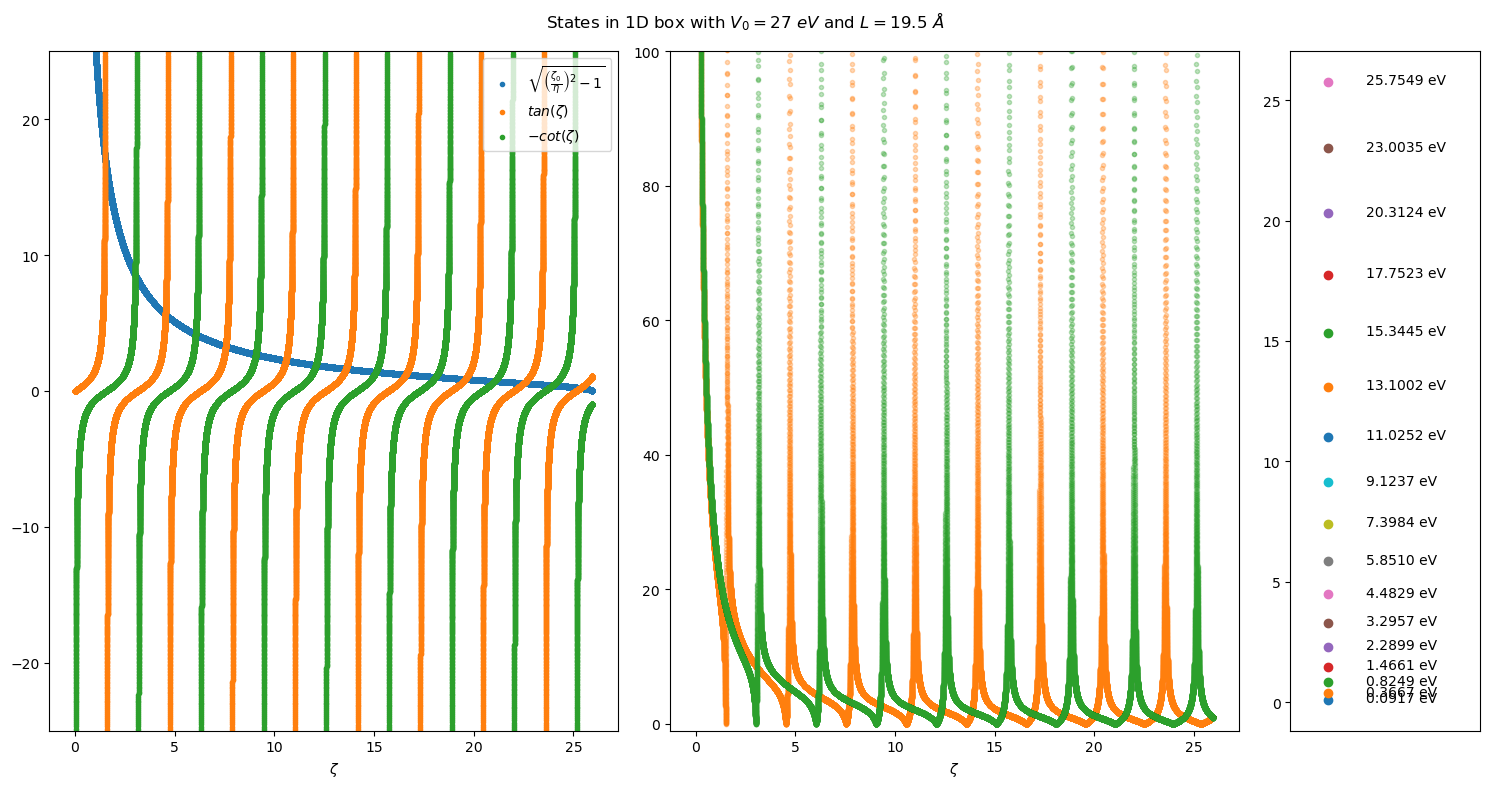

In [86]:
e = 4.59
fig,ax,energies = create_1d_vl_box_plot(19.5,27)